# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import DataSet

In [2]:
df = pd.read_csv('Credit_Card_Applications.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range= (0,1))
X = mms.fit_transform(X)
X[1:10]

array([[6.96090562e-01, 0.00000000e+00, 1.34135338e-01, 2.50000000e-01,
        5.00000000e-01, 5.38461538e-01, 3.75000000e-01, 5.78947368e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, 6.25000000e-02,
        0.00000000e+00, 2.30769231e-01, 3.75000000e-01, 4.38596491e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       [4.88425453e-01, 0.00000000e+00, 1.19097744e-01, 4.10714286e-01,
        0.00000000e+00, 3.07692308e-01, 2.50000000e-01, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.64179104e-01, 1.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [6.00795262e-01, 1.00000000e+00, 9.65413534e-02, 2.91785714e-01,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 6.87719298e-02,
        1.00000000e+00, 1.00000000e+0

# Training SOM

In [4]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

# Visualization

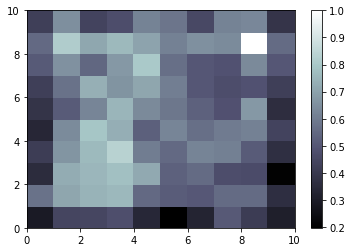

In [5]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()

## Lets mark the SOM

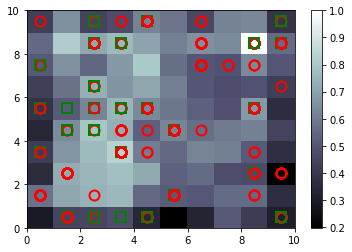

In [6]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot( w[0] + 0.5, 
          w[1] + 0.5,
          markers[y[i]],
          markeredgecolor = colors[y[i]],
          markerfacecolor = 'None',
          markersize = 10,
          markeredgewidth = 2)
show()    

# Finding Frauds

In [10]:
mappings = som.win_map(X)
frauds = mappings[(8,8)]
frauds = mms.inverse_transform(frauds)

In [11]:
frauds = pd.DataFrame(frauds)

In [12]:
frauds

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15767264.0,1.0,74.83,19.000,1.0,1.0,1.0,0.040,0.0,1.0,2.0,0.0,2.0,0.0,352.0
1,15704581.0,1.0,23.75,0.415,1.0,8.0,4.0,0.040,0.0,1.0,2.0,0.0,2.0,128.0,7.0
2,15761854.0,1.0,31.25,2.835,2.0,1.0,1.0,0.000,0.0,1.0,5.0,0.0,2.0,176.0,147.0
3,15725776.0,1.0,23.08,0.000,2.0,4.0,4.0,1.000,0.0,1.0,11.0,0.0,1.0,0.0,1.0
4,15815040.0,1.0,19.00,0.000,1.0,1.0,1.0,0.000,0.0,1.0,4.0,0.0,2.0,45.0,2.0
5,15697460.0,1.0,22.00,0.790,2.0,9.0,4.0,0.290,0.0,1.0,1.0,0.0,2.0,420.0,284.0
6,15788442.0,1.0,19.58,0.585,2.0,1.0,1.0,0.000,0.0,1.0,3.0,0.0,2.0,350.0,770.0
7,15737998.0,1.0,18.83,0.415,1.0,8.0,4.0,0.165,0.0,1.0,1.0,0.0,2.0,200.0,2.0
8,15586183.0,1.0,17.08,0.250,2.0,11.0,4.0,0.335,0.0,1.0,4.0,0.0,2.0,160.0,9.0
9,15718921.0,1.0,16.33,2.750,2.0,6.0,4.0,0.665,0.0,1.0,1.0,0.0,2.0,80.0,22.0
